# Learning how to use SODA API (https://dev.socrata.com/consumers/getting-started.html)

In [3]:
import pandas as pd

# Important info for working with API:
- API endpoint: https://data.sfgov.org/resource/vw6y-z8j6.json 
- Key Name: project311
- key ID: 1izx51hppbplpp02yd9r4gtlm
- Key Secret: 5ja9vkgnw7508zb1e1k29gsccgsgixp4xyg0t30b90jbgscsiq 
- App token: vWmXiIsPgC3AdJZayzXihvrtP
 



### Through API, grab only overflowing garbage data:

In [29]:
app_token = 'vWmXiIsPgC3AdJZayzXihvrtP'
trash = pd.DataFrame()
total_entries = 100000
for offset in range(0,total_entries,1000):
    query = f"https://data.sfgov.org/resource/vw6y-z8j6.json?$$app_token={app_token}&$limit=1000&$offset={offset}&service_name=Street and Sidewalk Cleaning&service_subtype=City_garbage_can_overflowing"
    trash = trash.append(pd.read_json(query.replace(" ","%20")),ignore_index=True)

In [169]:
trash.head() # Check data

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,street,supervisor_district,neighborhoods_sffind_boundaries,police_district,lat,long,point,source,media_url,closed_date
0,13036698,2020-10-18T08:19:26.000,2020-10-18T08:22:28.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of 24TH AVE and SANTIAGO ST,24TH AVE,4.0,Parkside,TARAVAL,37.744766,-122.481081,"{'latitude': '37.74476567', 'longitude': '-122...",Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN
1,13038974,2020-10-18T20:43:18.000,2020-10-19T03:02:55.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of MAYFAIR DR and HEATHER AVE,MAYFAIR DR,2.0,Laurel Heights / Jordan Park,RICHMOND,37.785788,-122.453008,"{'latitude': '37.78578791', 'longitude': '-122...",Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN
2,13036623,2020-10-18T07:51:50.000,2020-10-18T07:52:19.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"522 ARLINGTON ST, SAN FRANCISCO, CA, 94131",ARLINGTON ST,8.0,Glen Park,INGLESIDE,37.734764,-122.430435,"{'latitude': '37.734764', 'longitude': '-122.4...",Web,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN
3,13036678,2020-10-18T08:13:00.000,2020-10-19T03:41:45.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of HYDE ST and UNION ST,HYDE ST,3.0,Russian Hill,CENTRAL,37.799198,-122.419052,"{'latitude': '37.79919815', 'longitude': '-122...",Phone,NaN,NaN
4,13037795,2020-10-18T13:16:00.000,2020-10-18T13:17:30.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"4610 CALIFORNIA ST, SAN FRANCISCO, CA, 94118",CALIFORNIA ST,1.0,Inner Richmond,RICHMOND,37.784790,-122.466920,"{'latitude': '37.78479042', 'longitude': '-122...",Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN


### Get timing data:


In [214]:
# Get total response time, day opened, day closed:
trash['response_time'] = (pd.to_datetime(trash['closed_date'])-pd.to_datetime(trash['requested_datetime'])).dt.seconds/60
trash['day_opened'] = pd.to_datetime(trash['requested_datetime']).dt.day_name()
trash['day_closed'] = pd.to_datetime(trash['closed_date']).dt.day_name()


### Look at trash complaints by day of week and supervisor district:

In [241]:
complaints_by_day = pd.pivot_table(trash[['response_time','day_opened','supervisor_district']],values='response_time',index='supervisor_district',columns='day_opened',aggfunc='count')
cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
complaints_by_day = complaints_by_day[cols]
complaints_by_day.drop(index=0,inplace=True)
complaints_by_day

day_opened,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
supervisor_district,,,,,,,
1.0,1113,796,774,720,782,881,1427
2.0,587,431,373,351,338,531,715
3.0,1564,1347,1265,1197,1208,1334,1630
4.0,661,516,416,412,409,543,1031
5.0,1226,846,721,626,823,1136,1522
6.0,1051,972,962,942,1122,737,888
7.0,290,267,208,222,227,270,495
8.0,874,674,723,703,705,761,1320
9.0,1433,1230,1197,1105,1144,1095,2145


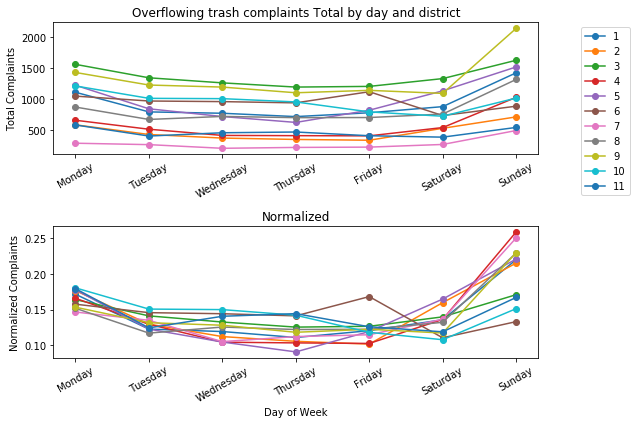

In [261]:
# plot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_day.T,marker='o')
axs[0].set_title('Overflowing trash complaints Total by day and district')
axs[0].set_ylabel('Total Complaints')
axs[0].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].plot(complaints_by_day.T/complaints_by_day.T.sum(),marker='o')
axs[1].set_xlabel('Day of Week')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].set_ylabel('Normalized Complaints')
axs[0].legend(range(1,12),bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Now look at city response times by day of week and district:

In [265]:
complaints_by_day = pd.pivot_table(trash[['response_time','day_opened','supervisor_district']],values='response_time',index='supervisor_district',columns='day_opened',aggfunc='mean')
cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
complaints_by_day = complaints_by_day[cols]
complaints_by_day.drop(index=0,inplace=True)

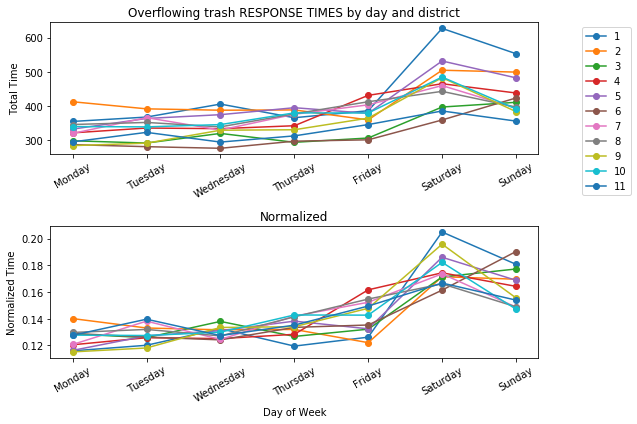

In [267]:
# plot response times:
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_day.T,marker='o')
axs[0].set_title('Overflowing trash RESPONSE TIMES by day and district')
axs[0].set_ylabel('Total Time')
axs[0].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].plot(complaints_by_day.T/complaints_by_day.T.sum(),marker='o')
axs[1].set_xlabel('Day of Week')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].set_ylabel('Normalized Time')
axs[0].legend(range(1,12),bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Now look at the data by month and year:

In [246]:
# Get month and year of request:
trash['month'] = pd.DatetimeIndex(trash['requested_datetime']).month
trash['year'] = pd.DatetimeIndex(trash['requested_datetime']).year


In [268]:
# careful here: For end of year effects (COUNT will be less in NOV AND DEC)
complaints_by_month = pd.pivot_table(trash[['supervisor_district','month','response_time']],values='response_time',index = 'supervisor_district',columns='month',aggfunc='count')
cols = ['January','February','March','April','May','June','July','August','September','October','November','December']
complaints_by_month.columns = cols
complaints_by_month.drop(index=0,inplace=True)

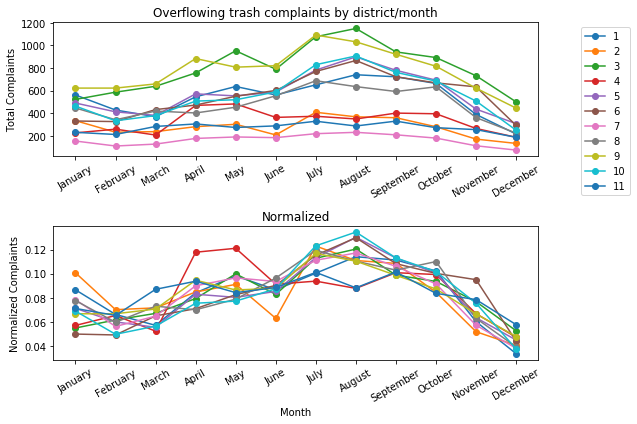

In [269]:
# Plot each district trend over the year:
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_month.T,marker='o')
axs[0].set_title('Overflowing trash complaints by district/month')
axs[0].set_ylabel('Total Complaints')
axs[0].set_xticklabels(complaints_by_month.columns,rotation=30)
axs[1].plot(complaints_by_month.T/complaints_by_month.T.sum(),marker='o')
axs[1].set_xlabel('Month')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_month.columns,rotation=30)
axs[1].set_ylabel('Normalized Complaints')
axs[0].legend(range(1,12),bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Response times by month:

In [285]:
complaints_by_month = pd.pivot_table(trash[['supervisor_district','month','response_time']],values='response_time',index = 'supervisor_district',columns='month',aggfunc='mean')
cols = ['January','February','March','April','May','June','July','August','September','October','November','December']
complaints_by_month.columns = cols
complaints_by_month.drop(index=0,inplace=True)
complaints_by_month

,January,February,March,April,May,June,July,August,September,October,November,December
supervisor_district,,,,,,,,,,,,
1.0,502.741993,391.014530,400.703694,437.208669,429.497096,435.429923,500.169990,528.157692,470.173744,445.319478,307.879915,369.039862
2.0,499.552488,341.965093,313.746148,427.826300,533.894499,490.437241,410.607620,487.133017,463.075208,461.558897,304.865988,260.322264
3.0,431.259050,282.239977,278.814502,319.945993,315.483316,362.366793,309.127298,383.431739,413.741110,376.286469,238.439800,224.948170
4.0,425.115492,363.688462,299.338301,369.348475,415.190442,405.720833,342.880125,472.192714,398.787355,420.686237,344.079637,315.349468
5.0,482.178649,390.359120,402.665489,342.112733,427.961101,468.233192,367.502536,451.949518,485.217970,439.437181,329.574676,330.454746
6.0,432.258082,376.110398,258.637606,325.692671,287.792136,311.209994,291.513377,359.289869,366.397095,344.339088,214.751998,183.508589
7.0,418.262473,361.207958,311.903776,330.751685,386.499215,406.600991,356.553030,483.247342,381.830476,402.077348,288.381711,325.929556
8.0,443.542617,338.999806,297.405635,330.312407,429.174816,372.090781,410.610683,430.916562,433.181591,385.306887,277.311234,310.611333
9.0,361.910995,271.589299,286.314722,312.292025,426.953403,353.524929,327.820345,394.759819,428.328796,408.324326,284.519266,289.394694


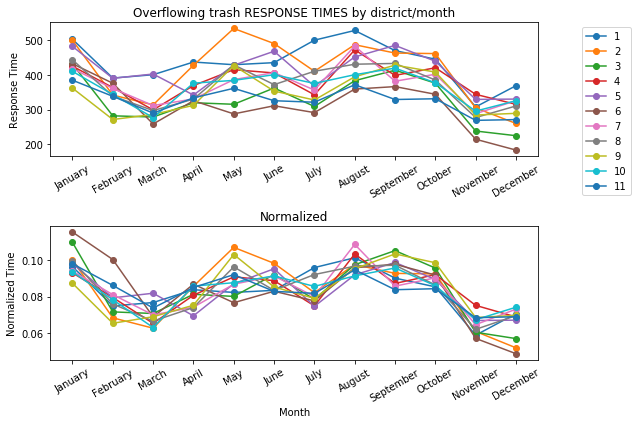

In [275]:
# Plot each district trend over the year:
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_month.T,marker='o')
axs[0].set_title('Overflowing trash RESPONSE TIMES by district/month')
axs[0].set_ylabel('Response Time')
axs[0].set_xticklabels(complaints_by_month.columns,rotation=30)
axs[1].plot(complaints_by_month.T/complaints_by_month.T.sum(),marker='o')
axs[1].set_xlabel('Month')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_month.columns,rotation=30)
axs[1].set_ylabel('Normalized Time')
axs[0].legend(range(1,12),bbox_to_anchor=(1.2, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Total complaints by district and year:

In [276]:
complaints_by_year = pd.pivot_table(trash[['supervisor_district','year','response_time']],values='response_time',index='supervisor_district',columns='year',aggfunc='count')
complaints_by_year.drop(index=0,inplace=True)

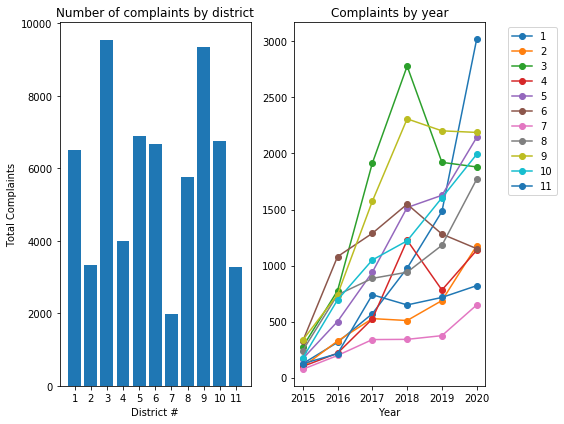

In [277]:
# plot total by district and break down by year:
fig, axs = plt.subplots(1,2,figsize=(8,6))
xticks = list(complaints_by_year.index)
axs[0].bar(x=complaints_by_year.index,height=complaints_by_year.T.sum())
axs[0].set_title('Number of complaints by district')
axs[0].set_ylabel('Total Complaints')
axs[0].set_xticks(xticks)
axs[0].set_xlabel('District #')
axs[1].plot(complaints_by_year.T,marker='o')
# axs[1].set_xlim(2007.5,2014.5)
axs[1].set_xlabel('Year')
axs[1].set_title('Complaints by year')
axs[1].legend(range(1,12),bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Response time by year:

In [282]:
complaints_by_year = pd.pivot_table(trash[['supervisor_district','year','response_time']],values='response_time',index='supervisor_district',columns='year',aggfunc='mean')
complaints_by_year.drop(index=0,inplace=True)
complaints_by_year

year,2015,2016,2017,2018,2019,2020
supervisor_district,,,,,,
1.0,153.298667,211.373439,206.994104,325.646076,464.000652,562.082815
2.0,80.948611,120.559888,142.432827,242.891863,596.448038,663.845119
3.0,94.286727,103.697874,97.675575,179.029765,564.937854,696.641897
4.0,103.729833,144.861035,168.651749,356.450625,449.762191,551.593609
5.0,170.525345,179.195975,238.758360,331.291063,476.989162,587.911264
6.0,138.330828,109.911265,132.127083,223.780911,532.969425,639.873458
7.0,226.580000,245.512626,215.101176,290.980653,413.106756,554.918747
8.0,185.070317,196.130965,220.133051,346.124265,456.270167,537.886712
9.0,179.080697,181.308997,168.510303,352.455414,400.505745,520.631269


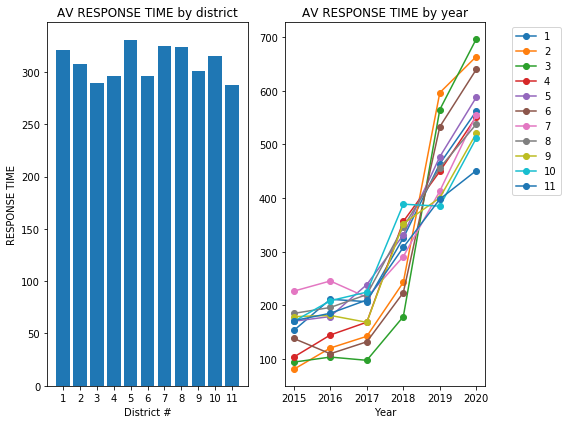

In [283]:
# plot total by district and break down by year:
fig, axs = plt.subplots(1,2,figsize=(8,6))
xticks = list(complaints_by_year.index)
axs[0].bar(x=complaints_by_year.index,height=complaints_by_year.T.mean())
axs[0].set_title('AV RESPONSE TIME by district')
axs[0].set_ylabel('RESPONSE TIME')
axs[0].set_xticks(xticks)
axs[0].set_xlabel('District #')
axs[1].plot(complaints_by_year.T,marker='o')
# axs[1].set_xlim(2007.5,2014.5)
axs[1].set_xlabel('Year')
axs[1].set_title('AV RESPONSE TIME by year')
axs[1].legend(range(1,12),bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.tight_layout()

In [288]:
trash.head()

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,...,source,media_url,closed_date,response_time,day_opened,day_closed,Month,Year,month,year
0,13036698,2020-10-18T08:19:26.000,2020-10-18T08:22:28.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of 24TH AVE and SANTIAGO ST,...,Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN,NaN,Sunday,NaN,10,2020,10,2020
1,13038974,2020-10-18T20:43:18.000,2020-10-19T03:02:55.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of MAYFAIR DR and HEATHER AVE,...,Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN,NaN,Sunday,NaN,10,2020,10,2020
2,13036623,2020-10-18T07:51:50.000,2020-10-18T07:52:19.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"522 ARLINGTON ST, SAN FRANCISCO, CA, 94131",...,Web,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN,NaN,Sunday,NaN,10,2020,10,2020
3,13036678,2020-10-18T08:13:00.000,2020-10-19T03:41:45.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of HYDE ST and UNION ST,...,Phone,NaN,NaN,NaN,Sunday,NaN,10,2020,10,2020
4,13037795,2020-10-18T13:16:00.000,2020-10-18T13:17:30.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"4610 CALIFORNIA ST, SAN FRANCISCO, CA, 94118",...,Mobile/Open311,{'url': 'http://mobile311.sfgov.org/reports/13...,NaN,NaN,Sunday,NaN,10,2020,10,2020


In [289]:
trash.columns


Index(['service_request_id', 'requested_datetime', 'updated_datetime',
       'status_description', 'status_notes', 'agency_responsible',
       'service_name', 'service_subtype', 'service_details', 'address',
       'street', 'supervisor_district', 'neighborhoods_sffind_boundaries',
       'police_district', 'lat', 'long', 'point', 'source', 'media_url',
       'closed_date', 'response_time', 'day_opened', 'day_closed', 'Month',
       'Year', 'month', 'year'],
      dtype='object')

In [290]:
pd.unique(trash['police_district'])

array(['TARAVAL', 'RICHMOND', 'INGLESIDE', 'CENTRAL', 'NORTHERN', 'PARK',
       'MISSION', 'BAYVIEW', nan, 'SOUTHERN', 'TENDERLOIN'], dtype=object)

### Check out plot by police district:

In [297]:
complaints_by_day = pd.pivot_table(trash[['response_time','day_opened','police_district']],values='response_time',index='police_district',columns='day_opened',aggfunc='mean')
cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
complaints_by_day = complaints_by_day[cols]

In [298]:
complaints_by_day

day_opened,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
police_district,,,,,,,
BAYVIEW,316.577863,324.391802,348.570943,356.384189,343.730580,498.782442,372.106429
CENTRAL,300.074761,288.725714,312.793826,286.235716,297.321997,407.355106,408.149181
INGLESIDE,291.035944,318.626898,310.328974,315.468211,343.961730,427.395947,384.033843
MISSION,329.742576,323.305132,335.197957,370.085225,408.526273,451.504396,386.476681
NORTHERN,349.726220,367.169813,364.086127,389.009988,369.620846,486.127782,484.592013
PARK,347.119857,385.518248,397.796499,442.322468,367.495902,542.180980,453.353102
RICHMOND,362.898635,367.324596,408.834137,360.631914,388.611585,626.223402,558.727781
SOUTHERN,273.699153,277.044141,284.992904,339.254499,335.238587,356.347832,416.000689
TARAVAL,320.064354,338.464911,321.812976,336.281514,432.296680,469.836361,423.215906


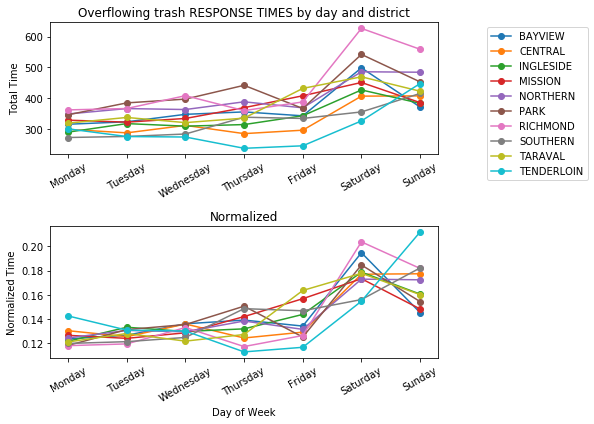

In [299]:
# plot response times:
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_day.T,marker='o')
axs[0].set_title('Overflowing trash RESPONSE TIMES by day and police district')
axs[0].set_ylabel('Total Time')
axs[0].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].plot(complaints_by_day.T/complaints_by_day.T.sum(),marker='o')
axs[1].set_xlabel('Day of Week')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].set_ylabel('Normalized Time')
axs[0].legend(complaints_by_day.index,bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.tight_layout()

In [300]:
complaints_by_day = pd.pivot_table(trash[['response_time','day_opened','police_district']],values='response_time',index='police_district',columns='day_opened',aggfunc='count')
cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
complaints_by_day = complaints_by_day[cols]
complaints_by_day

day_opened,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
police_district,,,,,,,
BAYVIEW,1103,988,908,877,787,841,1470
CENTRAL,1532,1330,1258,1196,1210,1358,1628
INGLESIDE,1149,878,906,874,709,621,981
MISSION,1522,1234,1354,1260,1329,1236,2147
NORTHERN,1448,1086,877,801,985,1207,1734
PARK,653,390,357,339,362,510,763
RICHMOND,1172,826,830,775,820,965,1522
SOUTHERN,669,660,559,615,682,492,605
TARAVAL,1052,845,709,687,728,980,1643


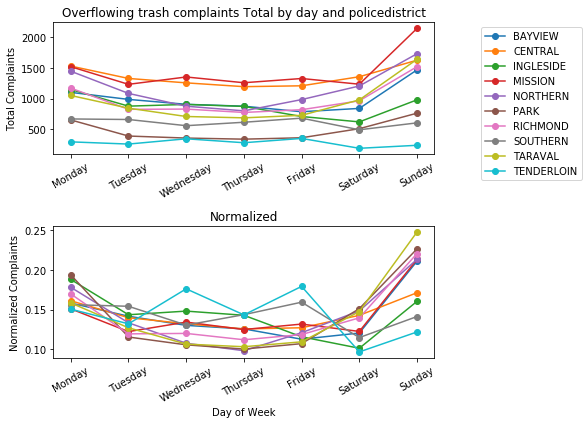

In [301]:
# plot
fig, axs = plt.subplots(2,1,figsize=(9,6))
axs[0].plot(complaints_by_day.T,marker='o')
axs[0].set_title('Overflowing trash complaints Total by day and policedistrict')
axs[0].set_ylabel('Total Complaints')
axs[0].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].plot(complaints_by_day.T/complaints_by_day.T.sum(),marker='o')
axs[1].set_xlabel('Day of Week')
axs[1].set_title('Normalized')
axs[1].set_xticklabels(complaints_by_day.columns,rotation=30)
axs[1].set_ylabel('Normalized Complaints')
axs[0].legend(complaints_by_day.index,bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.tight_layout()

In [302]:
# My guess is most complaints are on Sunday because trash people aren't working the weekend and people are at home long enough to complain




### Now check out the 2019 and 2020 years by month to see if COVID had an effect on trash complaints:

In [308]:
trash_covid = trash[trash['year']>=2018]
complaints_by_year = pd.pivot_table(trash_covid[['month','year','response_time']],values='response_time',index='month',columns='year',aggfunc='count')


In [309]:
complaints_by_year

year,2018,2019,2020
month,,,
1,212.0,731.0,2989.0
2,879.0,1281.0,1462.0
3,753.0,731.0,876.0
4,1517.0,1651.0,879.0
5,1683.0,553.0,2088.0
6,995.0,1351.0,1752.0
7,1520.0,1375.0,1888.0
8,1386.0,2131.0,2169.0
9,1077.0,1702.0,2267.0


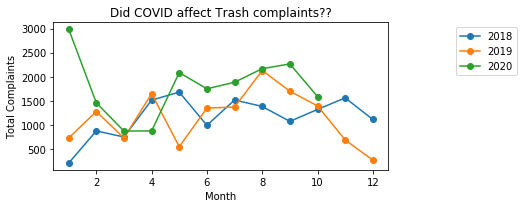

In [326]:
# plot total by district and break down by year:
plt.figure(figsize=(8,3))
# xticks = list(complaints_by_year.index)
# axs[0].bar(x=complaints_by_year.index,height=complaints_by_year.T.mean())
# axs[0].set_title('AV RESPONSE TIME by district')
# axs[0].set_ylabel('RESPONSE TIME')
# axs[0].set_xticks(xticks)
# axs[0].set_xlabel('District #')
plt.plot(complaints_by_year,marker='o')
# axs[1].set_xlim(2007.5,2014.5)
plt.xlabel('Month')
plt.ylabel('Total Complaints')
plt.title('Did COVID affect Trash complaints??')
plt.legend(complaints_by_year.columns,bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.tight_layout()

### Some thoughts:
- It is difficult to tell whether COVID increased trash complaints. It appears there is a bump in May, but the biggest feature here is really the wildly high level in Jan 2020
- I think this is related to a rebound from 2019 low numbers in Dec. 